#### 题目一

In [28]:
import pandas as pd
name=pd.ExcelFile('sz50.xlsx',On_Demand=True).sheet_names

from datetime import datetime
data = {}
for s in name:
    data[s] = pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
print(data.keys())

dict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


#### 题目二

In [29]:
import numpy as np
import pandas as pd
import talib as ta
stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
data=np.array(stock1.close)
print(type(data))
print(ta.MA(data,10)[-5:])



<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


#### 题目三

<class 'pandas.core.series.Series'>


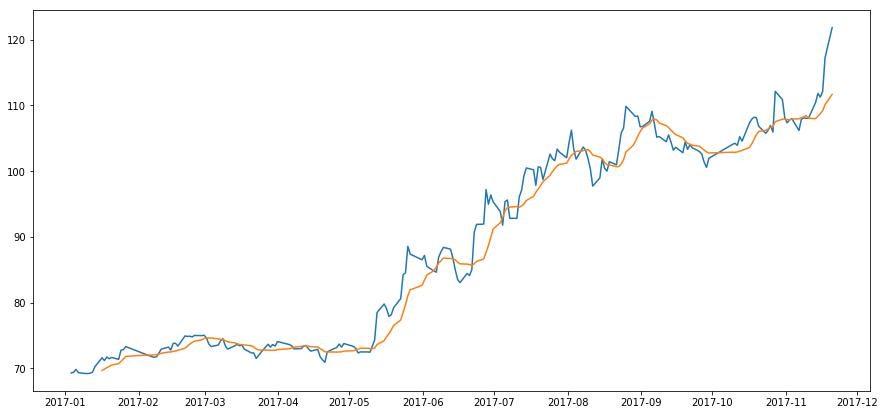

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
MA=(ta.MA(data,10)[:])
s = pd.Series(MA)
s.index=stock1.close.index
print(type(s))
plt.figure(figsize=(15, 7))
plt.plot(stock1.close)
plt.plot(s)
plt.show()

#### 题目四

In [40]:
import pandas as pd
from datetime import datetime
data = {}
name = pd.ExcelFile('sz50.xlsx',on_demand = True).sheet_names
for s in name:
    data[s] = pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
import numpy as np
import talib as ta

df = pd.DataFrame()
for (k,v) in data.items():
    try:
        df[k] = ta.ROCR100(v['close'],5)
    except KeyError:
        df[k] = pd.core.series.Series(np.repeat(np.nan,len(df)),index=df.index)
print(df)

                     600000.XSHG  600016.XSHG  600028.XSHG  600029.XSHG  \
datetime                                                                  
2017-01-03 15:00:00          NaN          NaN          NaN          NaN   
2017-01-04 15:00:00          NaN          NaN          NaN          NaN   
2017-01-05 15:00:00          NaN          NaN          NaN          NaN   
2017-01-06 15:00:00          NaN          NaN          NaN          NaN   
2017-01-09 15:00:00          NaN          NaN          NaN          NaN   
2017-01-10 15:00:00    99.387878    99.117193   107.129799   109.364261   
2017-01-11 15:00:00    98.959408    98.683146   103.435805   103.498294   
2017-01-12 15:00:00    98.888602    99.012018   101.401051   101.525424   
2017-01-13 15:00:00   100.555507   100.668747   100.343643   101.440678   
2017-01-16 15:00:00   102.228002   101.662584   101.718213   101.434599   
2017-01-17 15:00:00   101.361901   101.328583   101.535836    94.029851   
2017-01-18 15:00:00   102

<class 'pandas.core.frame.DataFrame'>


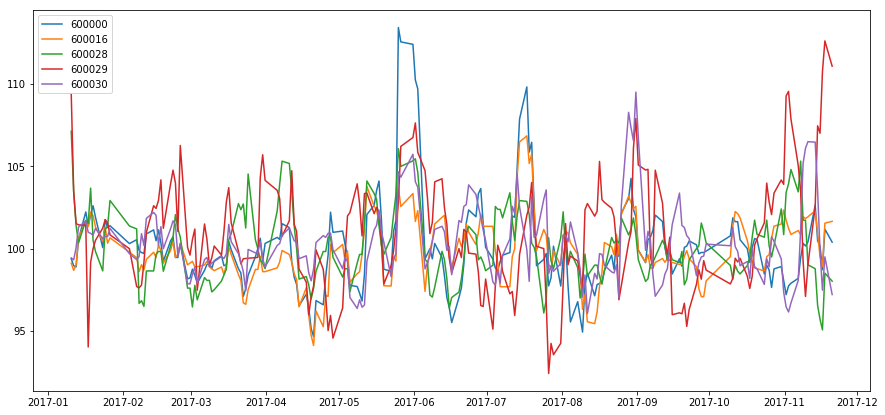

In [41]:
import pandas as pd
import warnings
import talib as ta
warnings.filterwarnings('ignore')
data1 = pd.read_excel('sz50.xlsx', sheet_name='600000.XSHG', index_col='datetime')
R1=ta.ROCR100(data1.close,timeperiod=5)
df1 = pd.DataFrame(R1)

data2 = pd.read_excel('sz50.xlsx', sheet_name='600016.XSHG', index_col='datetime')
R2=ta.ROCR100(data2.close,timeperiod=5)
df2 = pd.DataFrame(R2)

data3 = pd.read_excel('sz50.xlsx', sheet_name='600028.XSHG', index_col='datetime')
R3=ta.ROCR100(data3.close,timeperiod=5)
df3 = pd.DataFrame(R3)

data4 = pd.read_excel('sz50.xlsx', sheet_name='600029.XSHG', index_col='datetime')
R4=ta.ROCR100(data4.close,timeperiod=5)
df4 = pd.DataFrame(R4)

data5 = pd.read_excel('sz50.xlsx', sheet_name='600030.XSHG', index_col='datetime')
R5=ta.ROCR100(data5.close,timeperiod=5)
df5 = pd.DataFrame(R5)

print(type(df))
plt.figure(figsize=(15, 7))
plt.plot(df1)
plt.plot(df2)
plt.plot(df3)
plt.plot(df4)
plt.plot(df5)
plt.legend(['600000','600016','600028','600029','600030'])
plt.show()

#### 题目五

In [72]:
import pandas as pd
import talib as ta
import numpy as np
df = data['600036.XSHG']
sheetnames = pd.ExcelFile('sz50.xlsx',on_demand = True).sheet_names
from datetime import datetime
data = {}
for s in sheetnames:
    data[s] = pd.read_excel('sz50.xlsx',sheet_name=s, index_col='datetime')
dict_pn = {}
factors = ['macd','macdsignal','macdhist']
for i in range(3):
    dict_pn[factors[i]] = pd.DataFrame()
    for (k,v) in data.items():
        try:
            dict_pn[factors[i]][k] = ta.MACD(v['close'])[i]
        except KeyError:
            dict_pn[factors[i]][k] = pd.core.series.Series(np.repeat(np.nan,len(df)),index=df.index)

In [73]:
pn = pd.Panel(dict_pn)

In [74]:
mi = pn.to_frame()

In [75]:
print(mi)

                                      macd  macdsignal   macdhist
datetime            minor                                        
2017-02-24 15:00:00 600000.XSHG   0.871114    1.197907  -0.326792
                    600016.XSHG  -0.007077    0.265328  -0.272405
                    600028.XSHG   0.028081    0.052015  -0.023934
                    600029.XSHG   0.221787    0.132200   0.089587
                    600030.XSHG   0.602873    0.620235  -0.017362
                    600036.XSHG   1.291055    1.245643   0.045412
                    600048.XSHG   2.316978    1.771997   0.544982
                    600050.XSHG  -0.105248   -0.189278   0.084029
                    600100.XSHG   0.453028    0.079491   0.373537
                    600104.XSHG   2.271146    2.012658   0.258488
                    600111.XSHG   2.429090    1.926561   0.502529
                    600340.XSHG   8.025312    5.194384   2.830927
                    600518.XSHG   1.014290    2.387216  -1.372926
          